In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("breast_cancer.csv",sep=";")

In [3]:
data.describe()

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,diagnose
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [4]:
data.shape

(683, 10)

In [5]:
nrows=data.shape[0]
ncols=data.shape[1]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_features, test_features, train_labels, test_labels = train_test_split(data.iloc[range(0,nrows),range(0,ncols-1)],data.diagnose,test_size=0.25)


In [8]:
train_features

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
616,1,1,1,1,2,1,1,1,1
81,3,1,1,1,2,2,7,1,1
459,5,1,1,1,2,1,1,1,1
294,1,1,1,1,2,1,3,1,1
615,5,1,1,1,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...
397,10,10,10,6,8,4,8,5,1
35,10,10,10,8,6,1,8,9,1
153,2,1,1,1,2,1,3,1,1
90,4,1,1,1,2,1,3,1,1


In [9]:
test_labels

342    1
608    0
157    0
495    0
191    0
      ..
229    1
373    0
202    0
75     0
7      0
Name: diagnose, Length: 171, dtype: int64

RandomForest

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
rf=RandomForestClassifier(n_estimators=100)

In [12]:
rf.fit(train_features,train_labels)

RandomForestClassifier()

In [13]:
features_imp=pd.Series(rf.feature_importances_,index=train_features.columns).sort_values(ascending=False)
features_imp

cell_size_uniformity           0.348685
cell_shape_uniformity          0.191356
bare_nuclei                    0.150919
bland_chromatin                0.093988
single_epithelial_cell_size    0.089243
clump_thickness                0.047131
normal_nucleoli                0.040134
marginal_adhesion              0.031578
mitoses                        0.006966
dtype: float64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

No handles with labels found to put in legend.


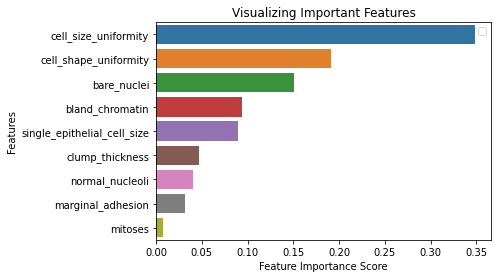

In [15]:
sns.barplot(x=features_imp, y=features_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [16]:
test_predlabels=rf.predict(test_features)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_labels, test_predlabels))

Accuracy: 0.9824561403508771


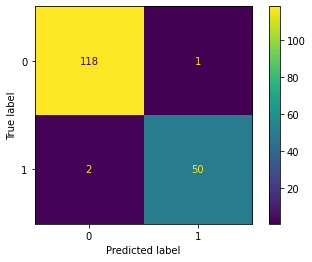

In [17]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
confusion_matrix(test_labels, test_predlabels)
plot_confusion_matrix(rf, test_features, test_labels)  
plt.show()  


XGBOOST

In [18]:
import xgboost as xgb
import numpy as np
import itertools

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from xgboost import XGBClassifier

/Users/rodrigoassar/opt/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
bstxgb = XGBClassifier()
bstxgb.fit(train_features,train_labels)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
test_xgbpredlabels = bstxgb.predict(test_features)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

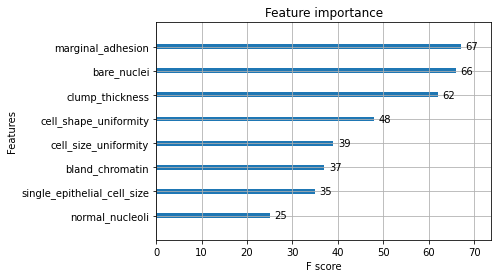

In [24]:
xgb.plot_importance(bstxgb)

In [26]:
print("Accuracy:",metrics.accuracy_score(test_labels, test_xgbpredlabels))

Accuracy: 0.9824561403508771


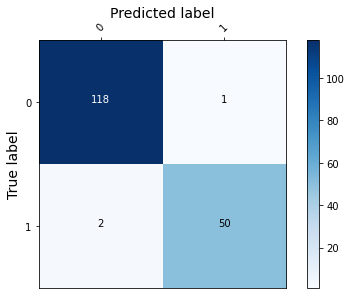

In [27]:
import numpy as np
class_names = [0,1]
matrix = confusion_matrix(test_labels,test_xgbpredlabels)
plt.clf()
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.

for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.show()